In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
data = pd.read_csv('prices.csv')


In [3]:
nvda_usa = data[(data["Ticker"]=="NVDA") & (data['Country']=="usa") & (data['Date'].between("2000-01-01","2005-12-31"))]



In [4]:
nvda_usa["Date"] = pd.to_datetime(nvda_usa["Date"], utc=True)
nvda_usa.set_index("Date", inplace=True)


/var/folders/nd/hqhwjwws0w1_nq09vxs1p8dc0000gn/T/ipykernel_96362/2292436109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvda_usa["Date"] = pd.to_datetime(nvda_usa["Date"], utc=True)


In [17]:
nvda = nvda_usa[["Volume"]].copy()
nvda["Log_Returns"] = nvda_usa.groupby("Ticker")["Close"].transform(lambda x: np.log(x / x.shift(1)))
nvda["Volume_Change"] = nvda_usa.groupby("Ticker")["Volume"].pct_change(-1)
nvda["Lagged_Volume"] = nvda_usa.groupby("Ticker")["Volume"].shift(-1)



In [18]:
nvda

,Volume,Log_Returns,Volume_Change,Lagged_Volume
Date,,,,
2005-12-30 05:00:00+00:00,22960800.0,NaN,-0.260436,31046400.0
2005-12-29 05:00:00+00:00,31046400.0,0.019234,0.174132,26442000.0
2005-12-28 05:00:00+00:00,26442000.0,0.022550,-0.281405,36796800.0
2005-12-27 05:00:00+00:00,36796800.0,-0.009224,0.715181,21453600.0
2005-12-23 05:00:00+00:00,21453600.0,-0.006108,-0.326071,31833600.0
...,...,...,...,...
2000-01-07 05:00:00+00:00,7118400.0,-0.032308,-0.409163,12048000.0
2000-01-06 05:00:00+00:00,12048000.0,-0.016554,-0.360347,18835200.0
2000-01-05 05:00:00+00:00,18835200.0,0.067475,-0.373163,30048000.0


In [19]:
nvda["Lagged_Volume_Change"] = nvda["Volume_Change"].shift(-1)

In [20]:
nvda.dropna()

,Volume,Log_Returns,Volume_Change,Lagged_Volume,Lagged_Volume_Change
Date,,,,,
2005-12-29 05:00:00+00:00,31046400.0,0.019234,0.174132,26442000.0,-0.281405
2005-12-28 05:00:00+00:00,26442000.0,0.022550,-0.281405,36796800.0,0.715181
2005-12-27 05:00:00+00:00,36796800.0,-0.009224,0.715181,21453600.0,-0.326071
2005-12-23 05:00:00+00:00,21453600.0,-0.006108,-0.326071,31833600.0,0.100062
2005-12-22 05:00:00+00:00,31833600.0,-0.007755,0.100062,28938000.0,-0.049206
...,...,...,...,...,...
2000-01-11 05:00:00+00:00,14812800.0,0.025936,-0.382429,23985600.0,2.369521
2000-01-10 05:00:00+00:00,23985600.0,0.041305,2.369521,7118400.0,-0.409163
2000-01-07 05:00:00+00:00,7118400.0,-0.032308,-0.409163,12048000.0,-0.360347


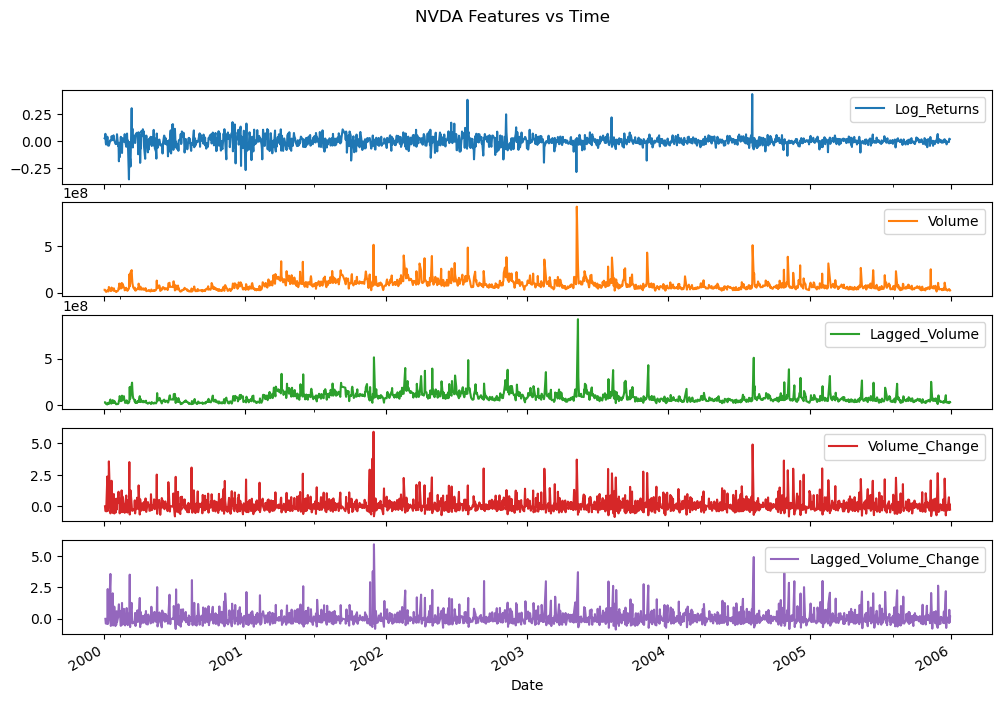

In [27]:
nvda[["Log_Returns", "Volume", "Lagged_Volume", "Volume_Change","Lagged_Volume_Change"]].plot(
    subplots=True, figsize=(12,8), title="NVDA Features vs Time"
)
plt.show()

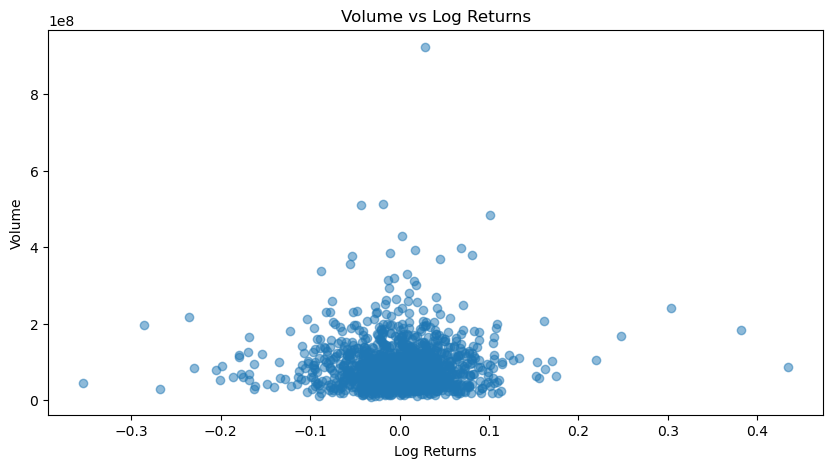

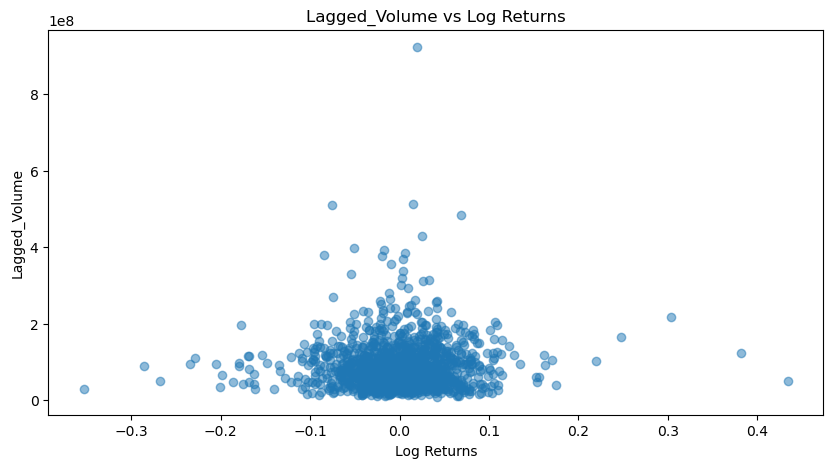

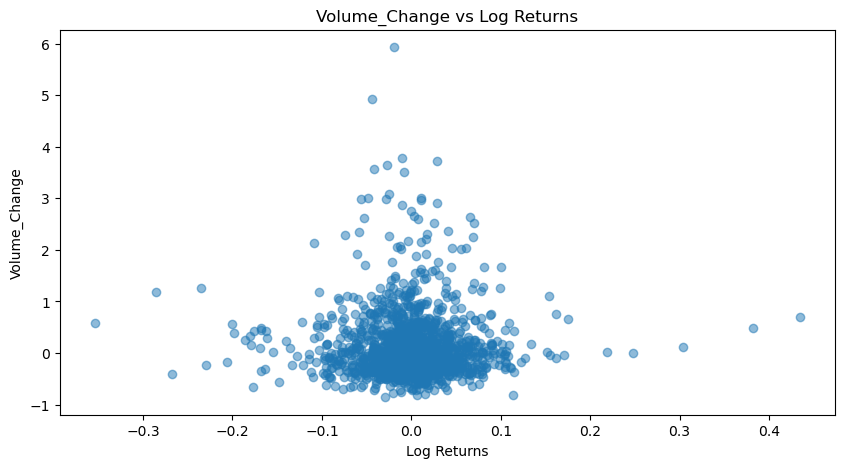

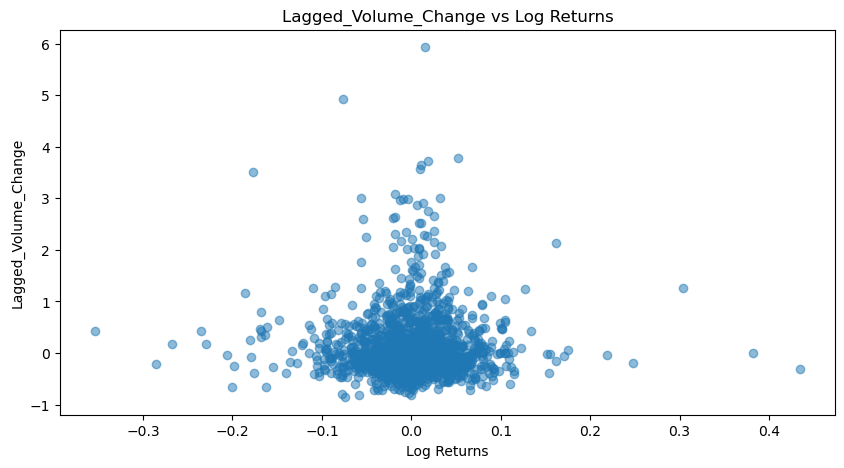

In [25]:
features = ["Volume", "Lagged_Volume", "Volume_Change", "Lagged_Volume_Change"]

for col in features:
    plt.figure(figsize=(10,5))
    plt.scatter(nvda["Log_Returns"],nvda[col],alpha=0.5)
    plt.xlabel("Log Returns")
    plt.ylabel(col)
    plt.title(f"{col} vs Log Returns")
    plt.show()